#Configuración de espacio

Para la correcta ejecución de este notebook se precisa instalar las siguientes librerias:

In [2]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



##Importacion de las librerias instaladas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

#Codigo

##Importacion de datos

###Importacion de dataset .csv

Se genera un DataFrame con la información de todas las copas del mundo jugadas.

In [4]:
df_csv = pd.read_csv("datasets/world_cup.csv", encoding = "utf-8")
df_csv.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,NaN,NaN,NaN,0,0,0
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


###Importacion de dataset .xlsx

Se genera un DataFrame con la informacion de canciones que se encuentran en Spotify.

In [5]:
df_xls = pd.read_excel("datasets/spotify.xlsx", "Hoja1")
df_xls.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6746.0,0,0.1430,0.0322,0.000001,0.3580,0.715,87917.00,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17235.0,1,0.0763,0.9240,0.000006,0.1010,0.267,77489.00,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9734.0,1,0.0557,0.2100,0.000000,0.1170,0.120,76332.00,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18515.0,1,0.0363,0.9050,0.000071,0.1320,0.143,181.74,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9681.0,1,0.0526,0.4690,0.000000,0.0829,0.167,119949.00,4,acoustic


##Procesamiento de datos

De acuerdo a la consigna, se realiza sobre el segundo DataFrame un Group By a un campo (en este caso album_name) y un sum() (en este caso al campo duration_ms)

In [6]:
df_xls_agrupado = pd.DataFrame(df_xls.groupby(["album_name"])["duration_ms"].sum())
df_xls_agrupado.sort_values(["duration_ms"], ascending=True, inplace=True)
df_xls_agrupado

,duration_ms
album_name,
ily (i love you baby),129750
Holly Jolly Christmas,131760
Merry Christmas,131760
Perfect Christmas Hits,131760
Christmas Music - Holiday Hits,131760
Christmas Time,131760
Ghost (Acoustic),149610
At My Worst,169728
"Cover Sessions, Vol. 3",174174


De acuerdo a la consigna, se realiza un melt sobre el segundo DataFrame.
Para el mismo, se tomó un subset del DataFrame y se realizo el melt tomando como id el campo track_name y como valores los campos popularity y duration_ms.

In [7]:
df_xls_melt = pd.melt(df_xls[:10], id_vars='track_name', value_vars=['popularity', 'duration_ms'])
df_xls_melt

,track_name,variable,value
0,Comedy,popularity,73
1,Ghost - Acoustic,popularity,55
2,To Begin Again,popularity,57
3,Can't Help Falling In Love,popularity,71
4,Hold On,popularity,82
5,Days I Will Remember,popularity,58
6,Say Something,popularity,74
7,I'm Yours,popularity,80
8,Lucky,popularity,74
9,Hunger,popularity,56


De acuerdo a la consigna, se realiza un gráfico de barras sobre el primer DataFrame.
En este caso, se eligió mostrar la asistencia promedio por pais anfitrión del mundial.

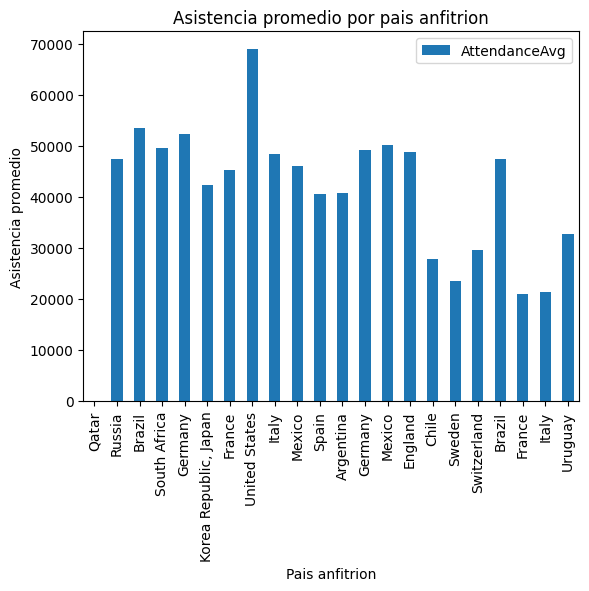

In [10]:
df_csv.plot(x = "Host", y = "AttendanceAvg", kind="bar")
plt.xlabel("Pais anfitrion")
plt.ylabel("Asistencia promedio")
plt.title("Asistencia promedio por pais anfitrion")
plt.show()